# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# String for Main Project Folder
path = r'C:\Users\ifari\12-2022 Instacart Basket Analysis'

In [3]:
# String to import Data Folder containing orders_products_all.pkl
df_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [4]:
# First 5 rows of the dataframe
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# Dropping "_merge" column
df_all = df_all.drop(columns = ['_merge'])

### 1. Creating Bar Charts

<AxesSubplot:>

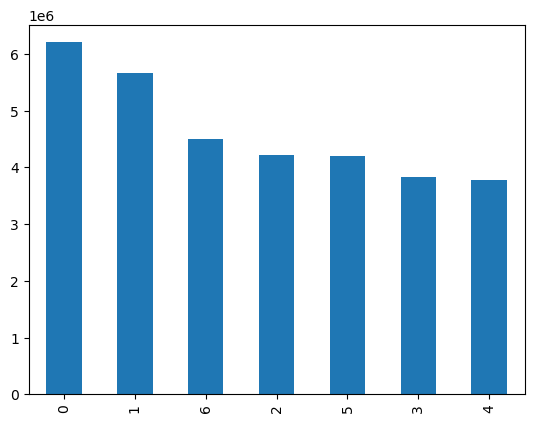

In [6]:
# Create a bar chart sorted from largest to smallest
df_all['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

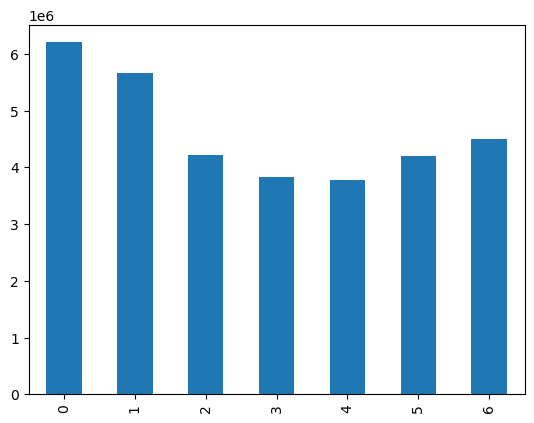

In [7]:
# Create a bar chart sorted according to index order
df_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# Create frequency chart sorted according to largest to smallest
df_all['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [9]:
# Create frequency chart sorted according to index order
df_all['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<AxesSubplot:>

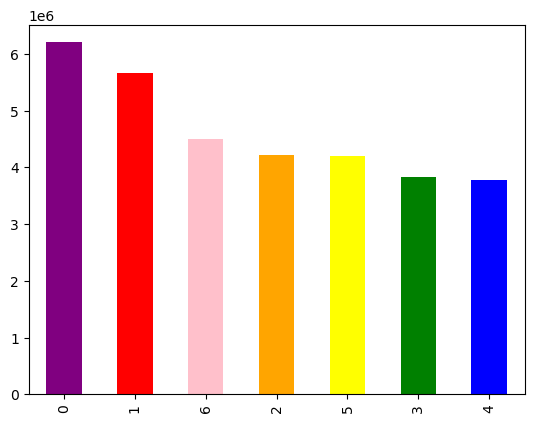

In [10]:
# Create a bar chart sorted from largest to smallest with color
df_all['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

#### 2. Exporting Charts

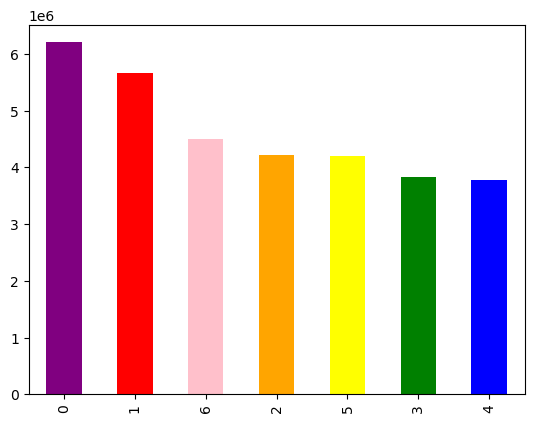

In [11]:
# Create a bar chart sorted from largest to smallest with color
bar = df_all['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [12]:
# Export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### 3. Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

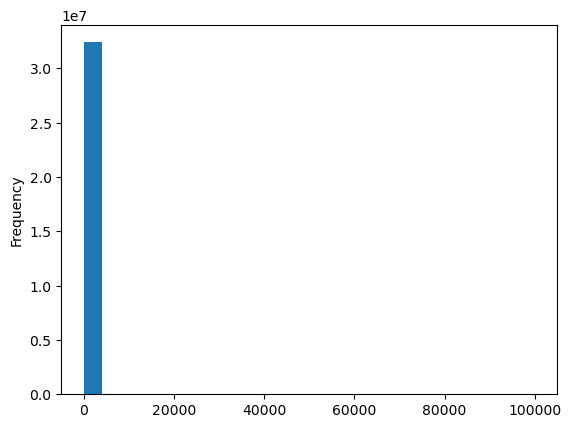

In [13]:
# Create a histogram
df_all['prices'].plot.hist(bins = 25)

In [14]:
# Descriptive statistics 'prices' column in the dataframe
df_all['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
# Mean of the 'prices' column
df_all['prices'].mean()

11.98022563865405

In [16]:
# Median of the 'prices' column
df_all['prices'].median()

7.4

In [17]:
# Maximum of the 'prices' column
df_all['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

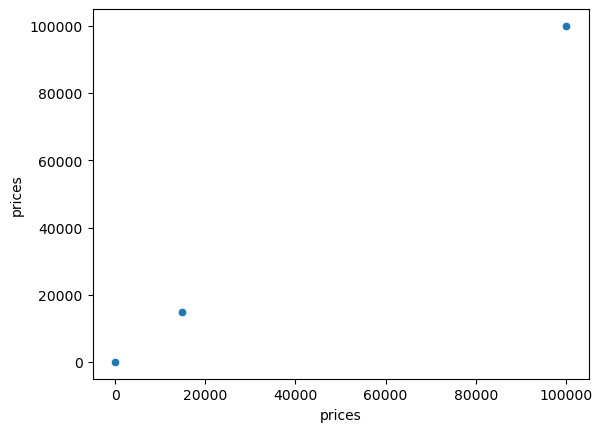

In [18]:
# Create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = df_all)

In [19]:
# # Locate prices greater than $100
df_all.loc[df_all['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,new_customer,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,False,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,False,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,False,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,False,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,True,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,False,NaN,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,False,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,False,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,False,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [20]:
# Mark prices greater than $100 as missing
df_all.loc[df_all['prices'] > 100, 'prices'] = np.nan

In [21]:
# # Maximum of the 'prices' column
df_all['prices'].max()

25.0

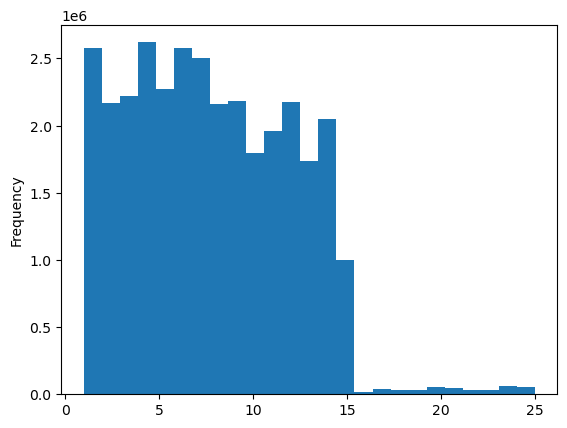

In [22]:
# Create a histogram with 25 bins
hist = df_all['prices'].plot.hist(bins = 25)

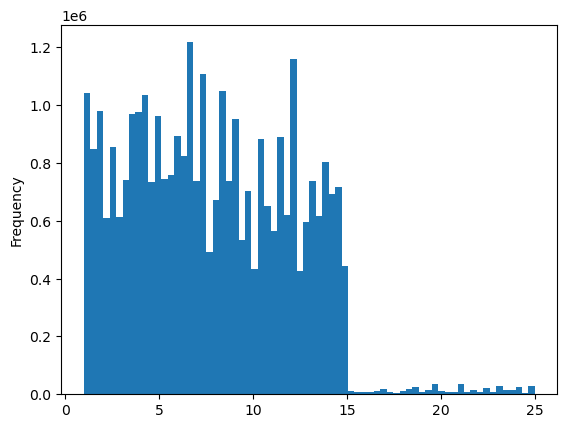

In [23]:
# Create a histogram with 70 bins
hist_2 = df_all['prices'].plot.hist(bins = 70)

In [24]:
# Export the bar chart
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

#### 4. Creating Line Charts

In [34]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7
np.random.rand(10)
dev = np.random.rand(len(df_all)) <= 0.7

In [35]:
# Store 70% of the sample in the dataframe big
big = df_all[dev]

In [36]:
# Store 30% of the sample in the dataframe small
small = df_all[~dev]

In [37]:
# Number of rows in the dataframe
len(df_all)

32404859

In [38]:
# Check the number of rows in the dataframe
len(big) + len(small)

32404859

In [39]:
# Create a dataframe to contains only the 'prices' and 'orders_day_of_week' columns from the small subset
df_2 = small[['orders_day_of_week','prices']]

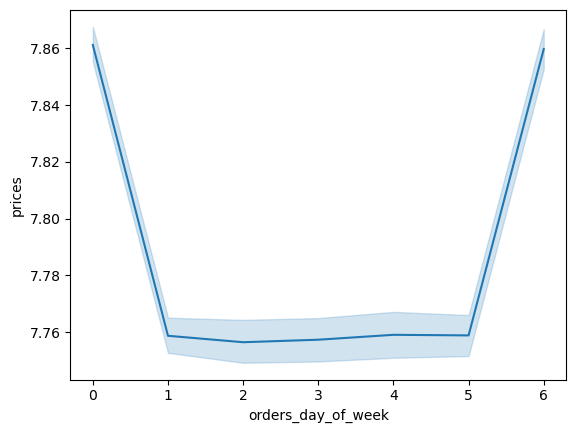

In [40]:
# Create a line chart of the small subset
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [43]:
# Export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_day_of_week_vs_prices.png.png'))